<h1 align="center">Titanic Competition<font color = 'green'></font></h1>
<h2 align="center">EDA , Visualization and Modeling.<font color='green'></font></h2>
<center>
<img src="https://images.ctfassets.net/i01duvb6kq77/3zejHEiU3R8mZ95V0FuGxz/287cf806393c09a0de8c9a56c122909e/feature_titanic-sinking.jpg?w=1100&q=80&fm=jpg&fl=progressive">
</center>

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Importing Main libraries needed](#1)
- [Handling missing data in age column](#2)
- [Handling missing data in cabin column](#3)
- [Handling outliers](#4)
- [Visualization to get more insights](#5)
- [ Features and labels](#6) 
- [Modeling](#7)
- [Regularization](#8)
- [Last Preparation of test data and result](#9)

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Importing Main libraries needed</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Loading Our Data using pandas library</p>
<h2 align="center">Shape of train and test<font color='green'></font></h2> 

#### the  shape presenting to us the datafram rows and columns. 

#### what we need to focus on is our columns we find that there is one added column in train data which represents the label column "Survived" 

#### From the data we need to predict if the person was survived or not based on features. But first we need to understand our data and start 

#### preprocessing phase before modeling

In [2]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")  
test = pd.read_csv("/kaggle/input/titanic/test.csv")
train.shape , test.shape

((891, 12), (418, 11))

In [3]:
#survived is the label column in training data
train.columns , test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info() , test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Preprocessing</p>

<center>
<img src="https://i.pinimg.com/564x/9d/58/e9/9d58e990f223ee02fb7a916a6f10e818.jpg">
</center>
<h2 align="center">Handling Missing Data<font color='green'></font></h2> 

In [6]:
train.isnull().sum() , test.isnull().sum()
#age and capin have null values

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Handling missing data in age column</p> 

In [7]:
print(train['Age'].describe())
px.histogram(train , x = 'Age')

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [8]:
train['Age'].fillna(train['Age'].mean() , inplace = True)

/tmp/ipykernel_18/2573288025.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [9]:
train['Age'].isnull().sum()

0

In [10]:
print(test['Age'].describe())
px.histogram(test , x = 'Age')

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64


In [11]:
test['Age'].fillna(test['Age'].mean() , inplace = True)

/tmp/ipykernel_18/896429489.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [12]:
test["Age"].isnull().sum()

0

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Handling missing data in Cabin column</p> 

In [13]:
train["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [14]:
passid = test['PassengerId'].copy()

## The missing data is more than 3/4 of our rows 
# HOW CAN WE HANDLE 75% OF DATA BASED ON 25% OF IT?!!!!!!!!!!!!!!!!
## so we can ignore this feature 

In [15]:
#percent of missing data in train data , cabin column
(train['Cabin'].isnull().sum())/train.shape[0]*100

77.10437710437711

In [16]:
#percent of missing data in test data , cabin column
(test['Cabin'].isnull().sum())/test.shape[0]*100

78.22966507177034

In [17]:
train.drop(labels = 'Cabin' , inplace = True , axis = 1)
test.drop(labels = 'Cabin' , inplace = True , axis = 1)

In [18]:
train.shape , test.shape

((891, 11), (418, 10))

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;"> Handling outliers</p> 

<center>
<img src="https://i.pinimg.com/564x/b2/08/44/b208443e7d7f0d21908719f85dca7056.jpg">
</center>

#### Age column is the only column that may have outliers based on many different values otherwise other column so first we will check outliers and if there are we will handle it

In [19]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
# there are many many of them but let's make it together
px.box(train , y = 'Age')

In [21]:
# there are 42 people over than 54 years old
train[train['Age']>54].shape[0]

#we do not want to lose these data so instead of missing them we can make it in age range column

42

## turning the columns into numbers to ease using them in modeling
## we need to apply that on Fare and age columns

In [22]:
print(train['Age'].describe())

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [23]:
train.loc[train['Age']<=20, 'Age range'] = 0
train.loc[train['Age'].between(20,40), 'Age range'] = 1
train.loc[train['Age'].between(41,54), 'Age range'] = 2
train.loc[train['Age']>54, 'Age range'] = 3

In [24]:
train['Age range']

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    0.0
888    1.0
889    1.0
890    1.0
Name: Age range, Length: 891, dtype: float64

In [25]:
test.loc[test['Age']<=20, 'Age range'] = 0
test.loc[test['Age'].between(20,40), 'Age range'] = 1
test.loc[test['Age'].between(41,54), 'Age range'] = 2
test.loc[test['Age']>54, 'Age range'] = 3

In [26]:
test['Age range']

0      1.0
1      2.0
2      3.0
3      1.0
4      1.0
      ... 
413    1.0
414    1.0
415    1.0
416    1.0
417    1.0
Name: Age range, Length: 418, dtype: float64

In [27]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [28]:
train.loc[train['Fare']<=7.910400, 'Fare range'] = 0
train.loc[train['Fare'].between(7.910400, 14.454200), 'Fare range'] = 1
train.loc[train['Fare'].between( 14.454200,31.000000), 'Fare range'] = 2
train.loc[train['Fare']>31.000000, 'Fare range'] = 3

In [29]:
test.loc[train['Fare']<=7.910400, 'Fare range'] = 0
test.loc[train['Fare'].between(7.910400, 14.454200), 'Fare range'] = 1
test.loc[train['Fare'].between( 14.454200,31.000000), 'Fare range'] = 2
test.loc[train['Fare']>31.000000, 'Fare range'] = 3

In [30]:
px.histogram(train , x = 'Age range')

In [31]:
px.histogram(test , x = 'Age range')

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Visualization</p> 

<center>
<img src="https://i.pinimg.com/736x/55/bb/51/55bb51ff70e37d2874e29d06469dbc1a.jpg">
</center>

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Age range    889 non-null    float64
 12  Fare range   891 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 90.6+ KB


In [33]:
train['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [34]:
fig = px.histogram(train , x = 'Parch' , color = 'Survived' ,title = 'Parch VS. Survived')
fig.update_layout(bargap=0.2)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [35]:
fig = px.histogram(train , x = 'Pclass' , color = 'Survived' ,title = 'Pclass VS. Survived')
fig.update_layout(bargap=0.2)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [36]:
fig = px.histogram(train , x = 'Embarked' , color = 'Survived' ,title = 'Embarked VS. Survived')
fig.update_layout(bargap=0.2)
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [37]:
px.pie(train , values = 'Survived' , names = 'Sex' , title = 'Sex VS. Survived')

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Features and labels</p> 

### Now to find the correlation between every feature and other we need to split the training data into features  and labels and split the features into numerical  and categorical

In [38]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age range', 'Fare range'],
      dtype='object')

In [39]:
#maping the columns to turn them to binary in sex column and numbers in embarked to not make it as categorical
sexdic = {'female' : 1 , 'male' : 0}
train['sex2'] = train['Sex'].map(sexdic)

Embarked2 = {'S' : 0 , 'C' : 1 , 'Q' : 2}
train['Embarked2'] = train['Embarked'].map(Embarked2)

In [40]:
test['sex2'] = test['Sex'].map(sexdic)
test['Embarked2'] = test['Embarked'].map(Embarked2)

In [41]:
train.drop(labels = ['Name' , 'Sex' , 'Ticket' , 'Embarked' , 'Age' ,'PassengerId' , 'Fare'] , axis = 1 , inplace = True)
test.drop(labels = ['Name' , 'Sex' , 'Ticket' , 'Embarked' , 'Age' ,'PassengerId' , 'Fare'] , axis = 1 , inplace = True)

In [42]:
features = train.drop(labels = 'Survived' ,axis = 1).copy()
features.shape #the same number columns as test data
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Age range   889 non-null    float64
 4   Fare range  891 non-null    float64
 5   sex2        891 non-null    int64  
 6   Embarked2   889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


In [43]:
label = train['Survived'].copy()
label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features , label, test_size= 0.2, random_state=42)

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Modeling</p> 

<center>
<img src="https://i.pinimg.com/564x/db/4f/88/db4f88f155d22599f59765e14f4c5497.jpg">
</center>

In [45]:
x_train = x_train.fillna(0)

In [46]:
x_train.head(5)

,Pclass,SibSp,Parch,Age range,Fare range,sex2,Embarked2
331,1,0,0,2.0,2.0,0,0.0
733,2,0,0,1.0,1.0,0,0.0
382,3,0,0,1.0,1.0,0,0.0
704,3,1,0,1.0,0.0,0,0.0
813,3,4,2,0.0,3.0,1,0.0


<p style="background: rgba(250, 250, 250, 0.6);color: white;font-size:220%;">Logistic Regression</p> 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logr = LogisticRegression()
logr.fit(x_train , y_train)

y_pred = logr.predict(x_test)
accuracy_score(y_test, y_pred)

0.8044692737430168

[[87 18]
 [17 57]]


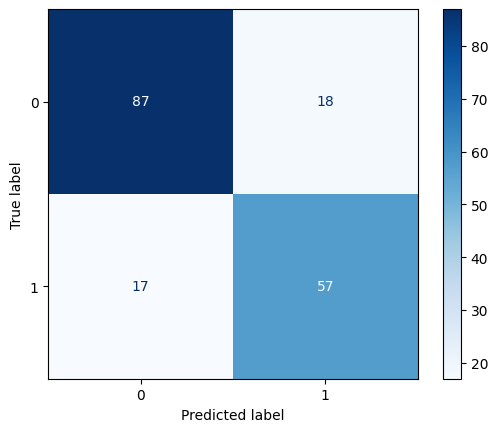

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



<p style="background: rgba(210, 145, 120, 0.3);color: white; ;font-size:200%">Regularization</p> 

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
log_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', multi_class='ovr')
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, multi_class='ovr',
                                          random_state=42, solver='liblinear'),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2']}])

In [51]:
grid_search.best_params_

{'C': 1, 'penalty': 'l1'}

In [52]:
logr_reg = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', multi_class='ovr', C=1, penalty='l1')
logr_reg.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=1000, multi_class='ovr', penalty='l1',
                   random_state=42, solver='liblinear')

In [53]:
y_predred = logr_reg.predict(x_test)

In [54]:
accuracy_score(y_test, y_predred)

0.7932960893854749

<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;">Last preparing of test data</p> 

In [55]:
test.isnull().sum()

Pclass        0
SibSp         0
Parch         0
Age range     1
Fare range    0
sex2          0
Embarked2     0
dtype: int64

In [56]:
test[test['Age range'].isnull() == True]

,Pclass,SibSp,Parch,Age range,Fare range,sex2,Embarked2
228,3,0,0,NaN,1.0,0,0


In [57]:
test['Age range'].describe()

count    417.000000
mean       1.095923
std        0.707384
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Age range, dtype: float64

In [58]:
test.fillna(1 ,inplace = True)

In [59]:
result = logr.predict(test)
print(result)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


<p style="background: rgba(250, 250, 250, 0.3);color: white;text-align: center;font-size:220%;"> The sumbition DataFrame</p>

In [60]:
# we have two columns of passenger id and survived or not 
data = {'PassengerId' : passid , 'Survived': result}
Submission = pd.DataFrame(data)
Submission.shape , Submission.head(5)

((418, 2),
    PassengerId  Survived
 0          892         0
 1          893         1
 2          894         0
 3          895         0
 4          896         1)

In [61]:
px.histogram(Submission , x = 'Survived')

In [62]:
Submission.to_csv('submission.csv', index=False)

In [63]:
print("Your submission was successfully saved!")

Your submission was successfully saved!


<center>
<img src="https://i.pinimg.com/originals/8d/c4/4e/8dc44e7cd357aa0ae050276864883d3e.gif">
</center>